# Assignment Python 2

Nama : Muhammad Danu Prasetia
</br>
Kode Peserta : PYTN-KS16-020
</br>
Python for Data Science

## Project Overview

NYC Property Sales Dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

*   BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
*   BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
*   BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

*   Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
*   This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

## Import Library

In [5]:
import numpy as np
import pandas as pd

import math
import statistics
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from IPython.display import Math, Latex
from IPython.core.display import Image

## Data Loading

In [6]:
df = pd.read_csv('../Dataset/nyc-rolling-sales.csv')
## Membaca 10 Data Teratas
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [7]:
## Membaca 10 Data Teratas
df.tail(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84538,8404,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,61,,B2,178 DARNELL LANE,...,2,0,2,3215,1300,1995,1,B2,-,2017-06-30 00:00:00
84539,8405,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,85,,B2,137 DARNELL LANE,...,2,0,2,3016,1300,1995,1,B2,-,2016-12-30 00:00:00
84540,8406,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,,B2,125 DARNELL LANE,...,2,0,2,3325,1300,1995,1,B2,509000,2016-10-31 00:00:00
84541,8407,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,...,2,0,2,11088,2160,1994,1,B2,648000,2016-12-07 00:00:00
84542,8408,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,...,2,0,2,3020,1800,1997,1,B9,-,2016-12-01 00:00:00
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


Kita menggantikan kolom "BOROUGH" yang awalnya masih berupa angka dengan Valuenya

In [8]:
df['BOROUGH'] = df.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [9]:
## Melihat info detail dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  object
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [10]:
## Melihat jumlah baris dan kolom pada dataset

x = df.shape[0]
y = df.shape[1]

print('Jumlah Baris: ', x, '\nJumlah Kolom: ', y)

Jumlah Baris:  84548 
Jumlah Kolom:  22


In [11]:
df.describe()

,Unnamed: 0,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [12]:
## Menampilkan Kolom yangada pada dataset
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

<b> Menemukan nilai Unique pada dataset </b>

In [13]:
for i in df.columns:
    print("\n", i)
    print(df[i].unique())


 Unnamed: 0
[    4     5     6 ... 26737 26738 26739]

 BOROUGH
['Manhattan' 'Bronx' 'Brooklyn' 'Queens' 'Staten Islands']

 NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTON


*   Berdasarkan yang di atas, untuk kolom **Unnamed:0** dan kolom **EASE-MENT** tidak memiliki informasi yang dibutuhkan.
*   Pada kolom **APARTMENT NUMBER** juga akan dihapus karena tidak terlalu diperlukan
*   Lalu, pada kolom **YEAR BUILT** dan **ZIP CODE** harus memiliki nilai, sehingga nilai 0 yang ada pada kedua kolom tersebut bisa diganti menjadi **nan**


**Membuat variabel untuk menampung missing value pada Dataset**

In [14]:
missing_val = ['na','--','NaN','NA','n/a','?',' ','n-a',' -  ']
df = pd.read_csv('../Dataset/nyc-rolling-sales.csv', na_values=missing_val)

## Pemrosesan Data

Penghapusan untuk ketiga kolom tersebut yaitu, Kolom Unnamed:0, EASE-MENT dan APARTMENT NUMBER

In [15]:
df.drop(["Unnamed: 0", "EASE-MENT", "APARTMENT NUMBER"], axis=1, inplace=True)

In [16]:
df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,10009,20,0,20,2581.0,9730.0,1900,2,C4,NaN,2017-07-20 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,10009,44,2,46,5163.0,21007.0,1900,2,C7,NaN,2017-07-20 00:00:00
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,10009,15,0,15,1534.0,9198.0,1920,2,D5,NaN,2017-06-20 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00


**Mengubah tipe data pada Dataset agar bisa dilakukan analisis pada beberapa kolom**

In [17]:
## Mengubah tipe data pada kolom SALE DATE menjadi Datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [18]:
## Mengubah  tipe data pada beberapa kolom menjadi int
int = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]
for col in int:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [19]:
#Mengubah tipe data pada kolom-kolom berikut menjadi category
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE',
               'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical:
    df[col] = df[col].astype("category")

In [20]:
## Mengecek kembali tipe data yang telah diubah sebelumnya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   ZIP CODE                        84548 non-null  category      
 9   RESIDENTIAL UNITS               84548 non-null  int64         
 10  COMMERCIAL UNITS                84548 non-null  int64         
 11  TO

## Data Cleaning

Melakukan pengecekan dataset apakah terdapat missing value dan duplikasi data

In [21]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [22]:
df.duplicated().sum()

765

Menghapus Duplikat Data yang sebanyak 765

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,5.772900e+04,5.639800e+04,6.960700e+04
mean,4242.903155,376.137415,1.999976,0.183677,2.213504,3.854481e+03,3.894416e+03,1.280703e+06
std,3568.789482,658.021286,16.569118,8.576582,18.777727,4.154737e+04,3.483726e+04,1.143036e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,1.643000e+03,1.040000e+03,2.300000e+05
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,5.330000e+05
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.552000e+03,9.500000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


**Handling Missing Value untuk kolom yang bertipe data category**

In [26]:
replace_mode = ['TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT']
for col1 in replace_mode:
    df[col1].fillna(df[col1].mode(), inplace=True)

**Handling Missing Value untuk kolom yang bertipe data numeric**

In [27]:
df["LAND SQUARE FEET"]=df["LAND SQUARE FEET"].fillna(df["LAND SQUARE FEET"].median())
df["GROSS SQUARE FEET"]=df["GROSS SQUARE FEET"].fillna(df["GROSS SQUARE FEET"].median())
df["SALE PRICE"]=df["SALE PRICE"].fillna(df["SALE PRICE"].median())

Melakukan pengecekan ulang

In [28]:
df.isna().sum()

BOROUGH                             0
NEIGHBORHOOD                        0
BUILDING CLASS CATEGORY             0
TAX CLASS AT PRESENT              738
BLOCK                               0
LOT                                 0
BUILDING CLASS AT PRESENT         738
ADDRESS                             0
ZIP CODE                            0
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
YEAR BUILT                          0
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
dtype: int64

Menghapus data duplicate untuk kolom YEAR BUILT

In [29]:
year_built = df["YEAR BUILT"].drop_duplicates()
year_built

0        1900
3        1913
6        1920
10       1910
11       2009
         ... 
33557    1871
39533    1893
44615    1865
45042    1882
81875    1680
Name: YEAR BUILT, Length: 158, dtype: category
Categories (158, int64): [0, 1111, 1680, 1800, ..., 2014, 2015, 2016, 2017]

In [30]:
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,8.378300e+04,8.378300e+04,8.378300e+04
mean,4242.903155,376.137415,1.999976,0.183677,2.213504,3.375438e+03,3.170620e+03,1.154192e+06
std,3568.789482,658.021286,16.569118,8.576582,18.777727,3.449485e+04,2.860114e+04,1.042234e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,3.000000e+05
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,5.330000e+05
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,2.650000e+03,2.080000e+03,8.350000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


Menghitung jumlah cell ynag bernilai 0 pada beberapa kolom pada dataset

In [31]:
print("Jumlah Data Bernilai 0 pada kolom YEAR BUILT adalah: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Jumlah Data Bernilai 0 pada kolom TOTAL UNIT adalah: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Jumlah Data Bernilai 0 pada kolom SALE PRICE adalah: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

Jumlah Data Bernilai 0 pada kolom YEAR BUILT adalah:  6885
Jumlah Data Bernilai 0 pada kolom TOTAL UNIT adalah:  19677
Jumlah Data Bernilai 0 pada kolom SALE PRICE adalah:  10012


Mengganti nilai 0 pada kolom-kolom tersebut dengan nan, karena kolom-kolom tersebut tidak boleh bernilai 0

In [32]:
df['YEAR BUILT'].replace(0, np.nan, inplace=True)
df['TOTAL UNITS'].replace(0, np.nan, inplace=True)
df['SALE PRICE'].replace(0, np.nan, inplace=True)

In [33]:
print("Jumlah Data Bernilai 0 pada kolom YEAR BUILT adalah: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Jumlah Data Bernilai 0 pada kolom TOTAL UNIT adalah: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Jumlah Data Bernilai 0 pada kolom SALE PRICE adalah: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

Jumlah Data Bernilai 0 pada kolom YEAR BUILT adalah:  0
Jumlah Data Bernilai 0 pada kolom TOTAL UNIT adalah:  0
Jumlah Data Bernilai 0 pada kolom SALE PRICE adalah:  0


Menghapus Missing Values yang ada

In [34]:
df.dropna(inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51546 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         51546 non-null  category      
 1   NEIGHBORHOOD                    51546 non-null  category      
 2   BUILDING CLASS CATEGORY         51546 non-null  category      
 3   TAX CLASS AT PRESENT            51546 non-null  category      
 4   BLOCK                           51546 non-null  int64         
 5   LOT                             51546 non-null  int64         
 6   BUILDING CLASS AT PRESENT       51546 non-null  category      
 7   ADDRESS                         51546 non-null  object        
 8   ZIP CODE                        51546 non-null  category      
 9   RESIDENTIAL UNITS               51546 non-null  int64         
 10  COMMERCIAL UNITS                51546 non-null  int64         
 11  TO

Pengecekkan Outlier pada kolom SALE PRICE

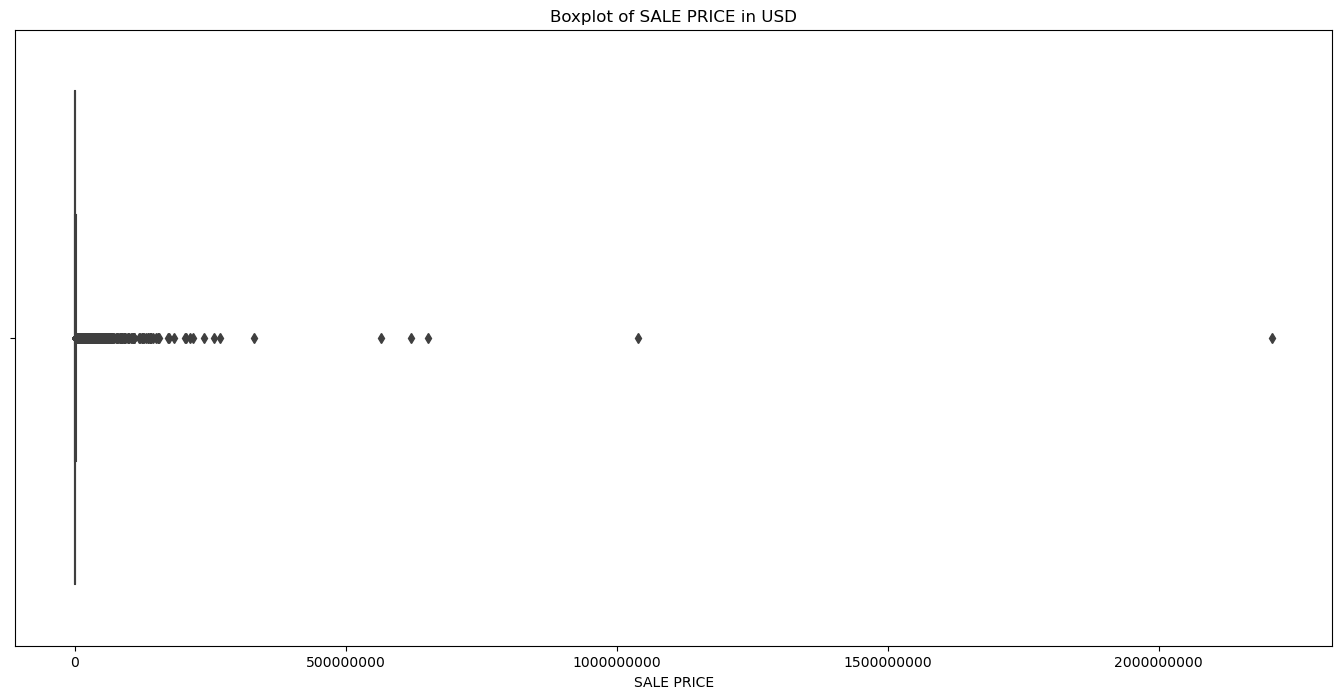

In [36]:
plt.figure(figsize=(17,8))


sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

Karena ada banyaknya outlier sehingga perlu adanya filter nilai terhadap kolom SALE PRICE

In [37]:
# Mengambil data SALE PRICE dalam rentang 100000 - 800000
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 800000)]

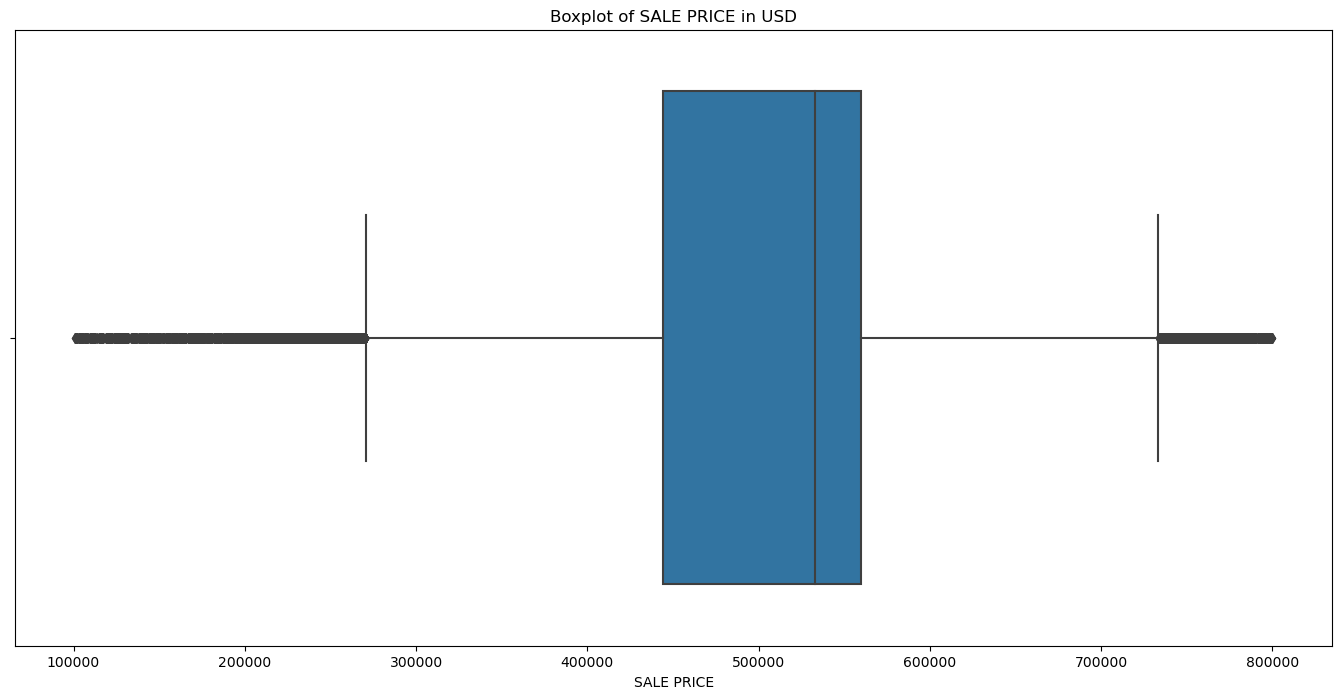

In [38]:
plt.figure(figsize=(17,8))


sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33240 entries, 1 to 84545
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         33240 non-null  category      
 1   NEIGHBORHOOD                    33240 non-null  category      
 2   BUILDING CLASS CATEGORY         33240 non-null  category      
 3   TAX CLASS AT PRESENT            33240 non-null  category      
 4   BLOCK                           33240 non-null  int64         
 5   LOT                             33240 non-null  int64         
 6   BUILDING CLASS AT PRESENT       33240 non-null  category      
 7   ADDRESS                         33240 non-null  object        
 8   ZIP CODE                        33240 non-null  category      
 9   RESIDENTIAL UNITS               33240 non-null  int64         
 10  COMMERCIAL UNITS                33240 non-null  int64         
 11  TO

Shape dataset setelah dilakukan cleaning data

In [40]:
x = df.shape[0]
y = df.shape[1]

print('Jumlah Baris: ', x, '\nJumlah Kolom: ', y)

Jumlah Baris:  33240 
Jumlah Kolom:  19


Setelah dilakukannya data cleaning pada dataset yang ada, terdapat pengurangan jumlah baris dari 84548 baris menjadi 33240 baris dan jumlah kolom dari 22 kolom menjadi 19 kolom. Data yang telah dibersihkan ini dapat digunakan untuk dibandingkan dengan data sebelumnya yang kemungkinan masih terdapat data null, missing value, data duplikat, dan lainnya yang jika tidak dilakukan pembersihan terlebih dahulu akan berpengaruh terhadap tingkat analisis data

In [41]:
df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})

In [42]:
df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31.0,4616.0,18690.0,1900,2,C7,533000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17.0,2212.0,7803.0,1900,2,C7,533000.0,2016-12-09
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,10009,20,0,20.0,2581.0,9730.0,1900,2,C4,533000.0,2017-07-20
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,10009,44,2,46.0,5163.0,21007.0,1900,2,C7,533000.0,2017-07-20
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,10009,15,0,15.0,1534.0,9198.0,1920,2,D5,533000.0,2017-06-20
10,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,394,44,D7,181 AVENUE C,10009,30,4,34.0,4295.0,21328.0,1910,2,D7,533000.0,2017-07-20
79,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,324 EAST 4TH STREET,10009,1,0,1.0,2314.0,1680.0,1920,2,R4,762669.0,2016-09-21
80,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,324 EAST 4TH STREET,10009,1,0,1.0,2314.0,1680.0,1920,2,R4,772851.0,2016-09-12
82,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1006,R4,324 EAST 4TH STREET,10009,1,0,1.0,2314.0,1680.0,1920,2,R4,533000.0,2016-11-03
83,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1007,R4,324 EAST 4TH STREET,10009,1,0,1.0,2314.0,1680.0,1920,2,R4,533000.0,2016-11-03


## Exploratory Data Analysis

### Measure of Central Tendency

#### Mean

In [43]:
mean_borough = df.groupby('BOROUGH').mean()

C:\Users\danup\AppData\Local\Temp\ipykernel_35592\415965563.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_borough = df.groupby('BOROUGH').mean()


In [44]:
mean_borough

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,1162.025715,1046.780135,5.309225,0.945034,6.371906,2941.598843,8586.459981,551868.071038
Bronx,4229.494257,118.194289,2.068592,0.046275,2.114539,2620.252379,2278.153922,454719.496226
Brooklyn,5154.577713,371.171405,1.754513,0.058726,1.822992,1981.770284,1704.962440,531021.716746
Queens,7722.878476,229.919006,2.207634,0.225866,2.466881,3921.786136,2888.354014,518863.461569
Staten Island,3261.245902,215.497933,1.288952,0.058731,1.350677,4296.569779,1872.173913,479749.732431


 **Kesimpulan:** Dapat dilihat bahwa Manhattan memiliki rata-rata paling besar di semua kolom termasuk SALE PRICE, kecuali untuk kolom Block, Commercial Unit, dan Land Square Feet yang diungguli oleh Queens.

#### Median

In [46]:
med_borough = df.groupby('BOROUGH').median()
med_borough

C:\Users\danup\AppData\Local\Temp\ipykernel_35592\896969885.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  med_borough = df.groupby('BOROUGH').median()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,1226.0,1113.0,1.0,0.0,1.0,2314.0,1680.0,533000.0
Bronx,4369.0,41.0,2.0,0.0,2.0,2492.0,1998.0,450000.0
Brooklyn,4920.0,55.0,1.0,0.0,1.0,1900.0,1440.0,550000.0
Queens,8618.5,43.0,1.0,0.0,1.0,2500.0,1680.0,533000.0
Staten Island,3040.0,58.0,1.0,0.0,1.0,3000.0,1640.0,533000.0


In [47]:
median_price = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=True)
median_price

,SALE PRICE
BOROUGH,
Bronx,450000.0
Manhattan,533000.0
Queens,533000.0
Staten Island,533000.0
Brooklyn,550000.0


**Kesimpulan:** Median yang paling rendah untuk kolom SALE PRICE adalah Bronx dengan 450.000 dan paling tinggi adalah Brooklyn yaitu 550.000.

#### Mode/Modus

In [48]:
mode_borough            = statistics.mode(df['BOROUGH'])
mode_Neighborhood       = statistics.mode(df['NEIGHBORHOOD'])
mode_TaxClassAtPresent = statistics.mode(df['TAX CLASS AT PRESENT'])
mode_BuildClassCategory       = statistics.mode(df['BUILDING CLASS CATEGORY'])
print("Mode Borough                         :" , mode_borough)
print("Mode Neighborhood                    :" , mode_Neighborhood)
print("Mode Tax Class at Present            :" , mode_TaxClassAtPresent )
print("Mode Building Class Category         :" , mode_BuildClassCategory )

Mode Borough                         : Queens
Mode Neighborhood                    : FLUSHING-NORTH
Mode Tax Class at Present            : 1
Mode Building Class Category         : 01 ONE FAMILY DWELLINGS                    


### Measure of Speed

#### Range

Mencari range harga untuk SALE PRICE setiap BOROUGH

In [49]:
range_borough_max = df.groupby('BOROUGH').apply(lambda x:x['SALE PRICE'].max())
range_borough_min = df.groupby('BOROUGH').apply(lambda x:x['SALE PRICE'].min())
print(range_borough_max,'\n')
print(range_borough_min)

BOROUGH
Manhattan        799500.0
Bronx            799000.0
Brooklyn         799326.0
Queens           799999.0
Staten Island    799000.0
dtype: float64 

BOROUGH
Manhattan        107820.0
Bronx            101500.0
Brooklyn         101000.0
Queens           101365.0
Staten Island    100700.0
dtype: float64


In [50]:
sale_range = range_borough_max = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min())
sale_range

BOROUGH
Manhattan        691680.0
Bronx            697500.0
Brooklyn         698326.0
Queens           698634.0
Staten Island    698300.0
dtype: float64

**Kesimpulan:** Range harga tertinggi dan terendah untuk setiap Borough hanya memiliki perbedaan yang tipis, begitupun dengan range harga setelah dikurangkan yaitu > 690.000 dan < 700.000

#### Variance

In [52]:
var_borough = df.groupby('BOROUGH').var()
var_borough

C:\Users\danup\AppData\Local\Temp\ipykernel_35592\1607239650.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var_borough = df.groupby('BOROUGH').var()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,3.142175e+05,717910.228171,1350.462548,168.305338,1529.207301,5.069350e+07,3.318655e+09,6.686725e+09
Bronx,8.998643e+05,70474.574189,73.524841,0.072382,73.509857,8.828127e+06,5.613665e+07,2.292858e+10
Brooklyn,6.275066e+06,291303.238775,42.074012,0.124197,42.154008,2.533582e+08,7.328386e+07,2.853781e+10
Queens,1.970488e+07,227306.659603,550.275505,335.528177,895.808833,2.417852e+09,1.953598e+09,1.558957e+10
Staten Island,5.119743e+06,204110.845412,3.765226,2.375221,6.028134,7.767154e+08,7.213998e+07,1.781652e+10


**Kesimpulan:** Nilai yang dihasilkan Variance termasuk nilai yang tinggi. Ini berarti data-data pada tabel tersebut memiliki distribusi yang besar

#### Standard Deviation

In [54]:
std_borough = df.groupby('BOROUGH').std()
std_borough

C:\Users\danup\AppData\Local\Temp\ipykernel_35592\3087372389.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_borough = df.groupby('BOROUGH').std()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,560.551027,847.295833,36.748640,12.973255,39.105080,7119.937134,57607.771999,81772.396199
Bronx,948.611759,265.470477,8.574663,0.269039,8.573789,2971.216482,7492.439587,151421.869236
Brooklyn,2505.008121,539.725151,6.486448,0.352416,6.492612,15917.228446,8560.599356,168931.371636
Queens,4439.017348,476.766882,23.457952,18.317428,29.930066,49171.654954,44199.529479,124858.189065
Staten Island,2262.684895,451.786283,1.940419,1.541175,2.455226,27869.614505,8493.525502,133478.522279


## Probability Distribution

Membuat probability distribution untuk Brooklyn

C:\Users\danup\AppData\Local\Temp\ipykernel_35592\3507272923.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(br['SALE PRICE'],


[Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Probability of Occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Brooklyn')]

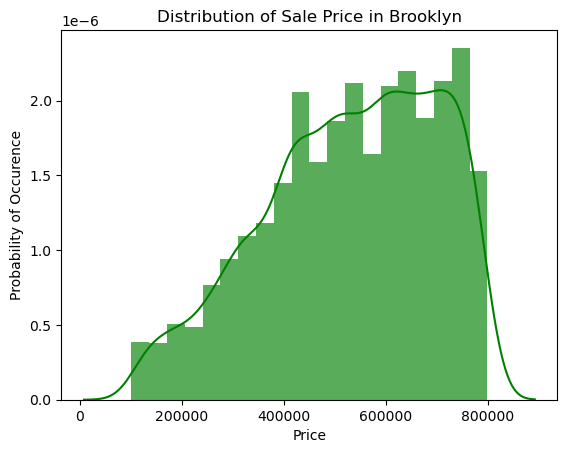

In [57]:
df1 = df.groupby("BOROUGH")
br = df1.get_group('Brooklyn')
ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=20,
                  color='green',
                  hist_kws={"linewidth": 17,'alpha':0.65})

ax.set(xlabel='Price',
       ylabel='Probability of Occurence',
       title='Distribution of Sale Price in Brooklyn')

Berdasarkan plot di atas, dapat dilihat bahwa distribusi probabilitas untuk Sale Price pada wilayah Brooklyn adalah distribusi normal.

## Confidence Intervals

Menampilkan Mean, Std, dan Size berdasarkan kolom SALE PRICE

In [62]:
c_intervals = df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
c_intervals

SALE PRICE                      
                        mean            std   size
BOROUGH                                           
Manhattan      551868.071038   81772.396199   3111
Bronx          454719.496226  151421.869236   3047
Brooklyn       531021.716746  168931.371636   4819
Queens         518863.461569  124858.189065  15248
Staten Island  479749.732431  133478.522279   7015

Mengambil parameter yang diperlukan hanya untuk wilayah Brooklyn dan menghitung standard error serta lower class boundary dan upper boundary class dengan confidence level 95% (z = 1.96)

Membuat parameter

In [64]:
mean_brooklyn = 531021
std_dev = 169831
n = 4819
z_score = 1.96

Z Score = 1.96

**Menghitung standard error menggunakan dengan formula SE dari mean dan kemudian membuat Confidence Interval**

In [66]:
se = std_dev / np.sqrt(n)

In [69]:
lcb = mean_brooklyn - z_score * se
ucb = mean_brooklyn + z_score * se
print("The lower class boundary is", lcb)
print("The upper class boundary is", ucb)

The lower class boundary is 526225.9341568742
The upper class boundary is 535816.0658431258


Berdasarkan hal diatas true mean untuk harga jual pada wilayah Brooklyn berada diantara 526225.9341568742 dan 526225.9341568742

## Hypothesis Testing

Pada bagian ini akan terdapat uji statistik yang untuk memeriksa apakah sampel data yang digunakan memiliki distribusi Gaussian dengan menggunakan Confidence Level 95% (alpha = 0.05).

**Hipotesis**
- Pengamatan di setiap sampel data terdistribusi dengan identik

**Interpretasi**
- H0: Pada sampel data terdapat distribusi Gaussian
- H1: Pada sampel data tidak terdapat distribusi Gaussian

In [87]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
brok = df1.get_group('Brooklyn')
sp2 = brok['SALE PRICE']
from scipy.stats import anderson
results = anderson(sp2)
print('stat = %.3f' % (results.statistic))
for i in range(len(results.critical_values)):
      sl, cv = results.significance_level[i], results.critical_values[i]
      if results.statistic < cv:
          print('Probably Gaussian at the %.1f%% level' % (sl))
      else:
          print('Probably not Gaussian at the %.1f%% level' % (sl))

stat = 39.849
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [88]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
mh = df1.get_group('Manhattan')
sp = mh['SALE PRICE']

from scipy.stats import shapiro
stat, p = shapiro(sp)
print('stat = %.3f \np = %.3f' % (stat, p))

stat = 0.629 
p = 0.000


In [89]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
br = df1.get_group('Queens')
sp1 = br['SALE PRICE']

from scipy.stats import normaltest
stat, p = normaltest(sp1)
print('stat = %.3f \np = %.3f' % (stat, p))

stat = 965.885 
p = 0.000


**Kesimpulan:** Dari hasil uji ketiga metode di atas, di dapatkan bahwa nilai P adalah < 0,05 yang artinya H0 ditolak yaitu pada sampel data terdapat distribusi Gaussian

### Overall Analysis

* Setelah dilakukannya data cleaning pada dataset yang ada, terdapat pengurangan jumlah baris dari 84548 baris menjadi 33240 baris dan jumlah kolom dari 22 kolom menjadi 19 kolom. Data yang telah dibersihkan ini dapat digunakan untuk dibandingkan dengan data sebelumnya yang kemungkinan masih terdapat data null, missing value, data duplikat, dan lainnya yang jika tidak dilakukan pembersihan terlebih dahulu akan berpengaruh terhadap tingkat analisis data

*  **Kesimpulan:** Dapat dilihat bahwa Manhattan memiliki rata-rata paling besar di semua kolom termasuk SALE PRICE, kecuali untuk kolom Block, Commercial Unit, dan Land Square Feet yang diungguli oleh Queens.

* **Kesimpulan:** Median yang paling rendah untuk kolom SALE PRICE adalah Bronx dengan 450.000 dan paling tinggi adalah Brooklyn yaitu 550.000.

* **Kesimpulan:** Range harga tertinggi dan terendah untuk setiap Borough hanya memiliki perbedaan yang tipis, begitupun dengan range harga setelah dikurangkan yaitu > 690.000 dan < 700.000

* 